- **Classify racist and sexist tweets from other tweets and filter them out**

#### Importing the necessary packages

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

#### training data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
# Making a copy of dataset

train_original=train.copy()

In [4]:
#view the dataset

train.shape

(31962, 3)

In [5]:
train.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


> here label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist

#### testing data

In [6]:
test = pd.read_csv('test.csv')

In [7]:
# Making a copy of dataset

test_original=test.copy()

In [8]:
test.shape

(17197, 2)

In [9]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [10]:
# combine Train and Test data for pre-processing 

combine = pd.concat([train, test], ignore_index=True, sort=True)

In [11]:
combine.shape

(49159, 3)

In [12]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [13]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


#### Data Pre-Processing

- Removing twitter handles (@user)

In [14]:
def remove_pattern(text, pattern):
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern, text)

    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i, "", text)

    return text

In [15]:
combine['Tidy_Tweets'] = combine['tweet'].apply(lambda x: remove_pattern(x, r'@[\w]*'))

In [16]:
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


- Removing punctuations, numbers, and special Characters (except hashtags)

In [17]:
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z#]', ' ', text)
    return cleaned_text

In [18]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(clean_text)

In [19]:
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


- Removing short words

terms like “hmm”, “oh” are of very little use

In [20]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


- Stemming

> stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word

In [21]:
# splitting a string of text into tokens

tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

In [22]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

In [23]:
# steaming

from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [24]:
# stitch these tokens back together

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


#### Visualization

- WordCloud

In [25]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

##### All positive words (non-racist/sexist)

In [26]:
all_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

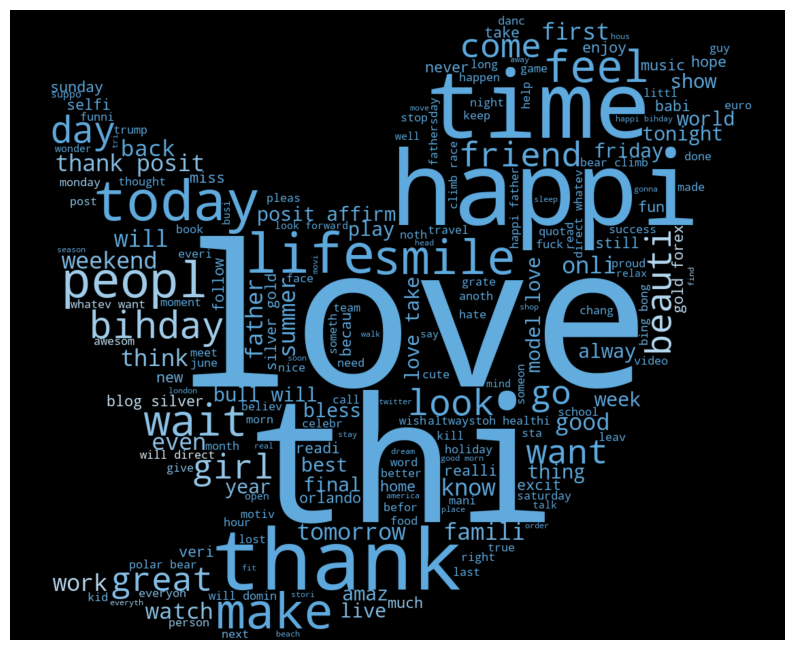

In [27]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)
 
wc = WordCloud(background_color='black', 
               height=1500, 
               width=4000, 
               mask=Mask).generate(all_positive)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()

##### All negative words (racist/sexist)

In [28]:
all_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

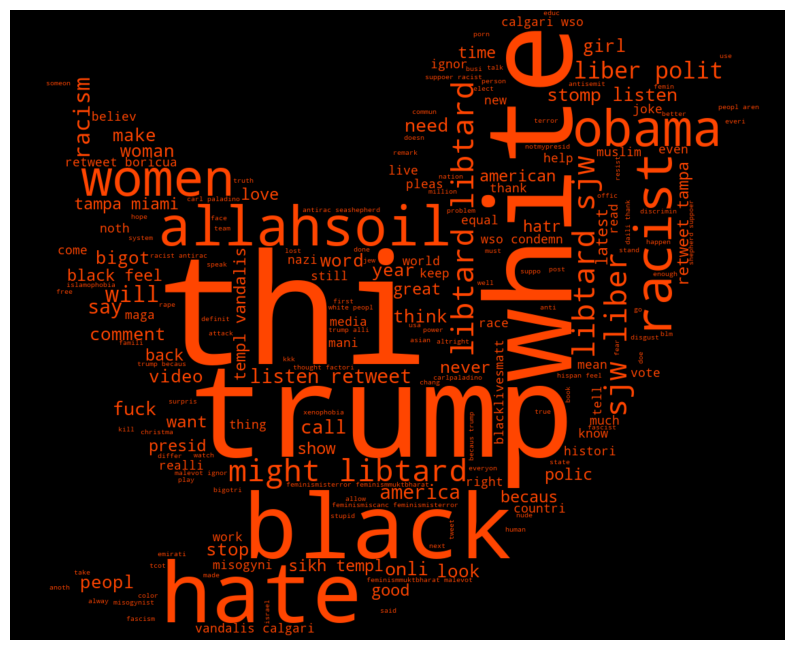

In [29]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)
 
wc = WordCloud(background_color='black', 
               height=1500, 
               width=4000,
               color_func=lambda *args, **kwargs: 'orangered',
               mask=Mask).generate(all_negative)

plt.figure(figsize=(10,20))
plt.imshow(wc, interpolation="hamming")
plt.axis('off')
plt.show()

- impact of Hashtags on tweets sentiment

In [30]:

def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [31]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

In [32]:
ht_positive_unnest = sum(ht_positive,[])

In [33]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

In [34]:
ht_negative_unnest = sum(ht_negative,[])

In [35]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive


FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [36]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [37]:
df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


In [38]:
df_positive_plot = df_positive.nlargest(20,columns='Count') 

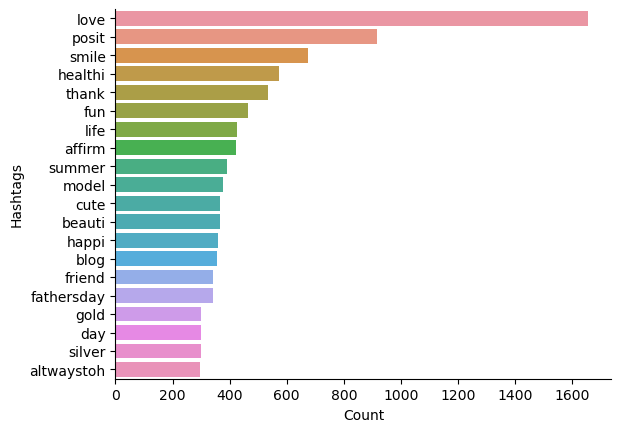

In [39]:
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [40]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [41]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [42]:
df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


In [43]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 

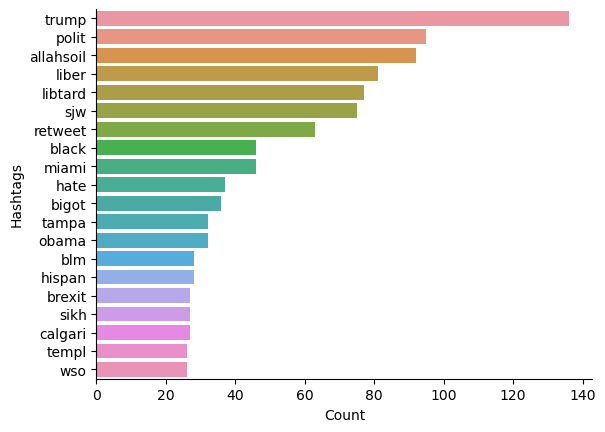

In [44]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

### Extracting features from cleaned tweets

##### 1. Bag-of-Words Features

-creates a vocabulary of all the unique words with their frequencies, occurring in all the documents

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### 2. TF-IDF Features

tf-df weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus

-importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Splitting the data into training and validation set

In [51]:
from sklearn.model_selection import train_test_split

1. Bag-of-words

In [50]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

2. TF-IDF

In [53]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

#### Model Implementation

##### 1. Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

##### 1.1 BOW

In [58]:
Log_Reg.fit(x_train_bow,y_train_bow)
prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow    

array([[9.86501156e-01, 1.34988440e-02],
       [9.99599096e-01, 4.00904144e-04],
       [9.13577383e-01, 8.64226167e-02],
       ...,
       [8.95457155e-01, 1.04542845e-01],
       [9.59736065e-01, 4.02639345e-02],
       [9.67541420e-01, 3.24585797e-02]])

In [59]:
from sklearn.metrics import f1_score

In [61]:
# if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int_)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.5721352019785655

##### 1.2 TF_IDF

In [62]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.98487907, 0.01512093],
       [0.97949889, 0.02050111],
       [0.9419737 , 0.0580263 ],
       ...,
       [0.98630906, 0.01369094],
       [0.96746188, 0.03253812],
       [0.99055287, 0.00944713]])

In [66]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int_)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5862068965517241

##### 2. XGBoost

In [69]:
from xgboost import XGBClassifier

##### 2.1 BOW

In [111]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [112]:
model_bow.fit(x_train_bow, y_train_bow)
xgb_probabilities = model_bow.predict_proba(x_valid_bow)
xgb_probabilities

array([[0.99086535, 0.00913467],
       [0.9988738 , 0.00112623],
       [0.93078405, 0.06921596],
       ...,
       [0.89689595, 0.10310404],
       [0.93078405, 0.06921596],
       [0.93078405, 0.06921596]], dtype=float32)

In [114]:
xgb_int = (xgb_probabilities[:, 1] >= 0.3).astype(np.int_)

# Calculating F1 score
xgb_bow = f1_score(y_valid_bow, xgb_int)

print(xgb_bow)

0.5754716981132075


##### 2.2 TF_IDF

In [117]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)

In [118]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)
xgb_tfidf = model_tfidf.predict_proba(x_valid_tfidf)
xgb_tfidf

array([[0.9931377 , 0.00686228],
       [0.99316466, 0.00683535],
       [0.95403224, 0.04596774],
       ...,
       [0.9874681 , 0.01253188],
       [0.9871812 , 0.01281883],
       [0.9985877 , 0.00141228]], dtype=float32)

In [119]:
xgb_tfidf = (xgb_tfidf[:, 1] >= 0.3).astype(np.int_)

# Calculating F1 score
xgb_f1 = f1_score(y_valid_tfidf, xgb_tfidf)
print(xgb_f1)

0.5700861393891934


##### 3. Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

##### 3.1 BOW

In [93]:
dct.fit(x_train_bow,y_train_bow)

dct_bow = dct.predict_proba(x_valid_bow)
dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [96]:
dct_int_bow = (dct_bow >= 0.3).astype(np.int_)

# Calculating F1 score
dct_score_bow = f1_score(y_valid_bow, dct_int_bow)

print(dct_score_bow)

0.5141776937618148


##### 3.2 TF_IDF

In [97]:
dct.fit(x_train_tfidf,y_train_tfidf)
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [104]:
dct_tfidf = (dct_tfidf[:, 1] >= 0.3).astype(np.int_)

# Calculating F1 score for multilabel classification
dct_score_tfidf = f1_score(y_valid_tfidf, dct_tfidf, average='binary')

print(dct_score_tfidf)

0.5498821681068342


#### Model Comparison

In [105]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

In [132]:
score = [log_bow,xgb_bow,dct_score_bow,log_tfidf,xgb_f1,dct_score_tfidf]

compare=pd.DataFrame({'Model':Algo,'F1_Score':score})

compare = compare.sort_values(by='F1_Score', ascending=False).reset_index(drop=True)

In [133]:
compare

,Model,F1_Score
0,LogisticRegression(TF-IDF),0.586207
1,XGBoost(Bag-of-Words),0.575472
2,LogisticRegression(Bag-of-Words),0.572135
3,XGBoost(TF-IDF),0.570086
4,DecisionTree(TF-IDF),0.549882
5,DecisionTree(Bag-of-Words),0.514178


#### Testing with best model

In [135]:
test_tfidf = tfidf_matrix[31962:]

In [137]:
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(np.int_)

test['label'] = test_pred_int

submission = test[['id','label']]

submission.to_csv('result.csv', index=False)

In [138]:
res = pd.read_csv('result.csv')

In [139]:
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
